In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

In [4]:
train = pd.read_csv('training_data.csv')
# test = pd.read_csv('test_data.csv')
train.head(3)

/var/folders/b0/jgk470jj3v9gjzh3bkpsqm6c0000gn/T/ipykernel_9410/1851024010.py:1: DtypeWarning: Columns (15,19,23,24,102,103,119) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('training_data.csv')


RecordID    HouseID RecordingDate  SalePrice PropertyAddressCity  \
0  894344101  249312309    2020-08-12   335000.0                PIRU   
1  754968002  222693201    2017-06-19   625000.0            FILLMORE   
2  861237964  222693201    2020-02-20   800000.0            FILLMORE   

  PropertyAddressState  PropertyAddressZIP     CombinedStatisticalArea  \
0                   CA             93040.0  Los Angeles-Long Beach, CA   
1                   CA             93015.0  Los Angeles-Long Beach, CA   
2                   CA             93015.0  Los Angeles-Long Beach, CA   

                                            CBSAName  CBSACode  ... SiloFlag  \
0  OXNARD-THOUSAND OAKS-VENTURA, CA METROPOLITAN ...     37100  ...      0.0   
1  OXNARD-THOUSAND OAKS-VENTURA, CA METROPOLITAN ...     37100  ...      0.0   
2  OXNARD-THOUSAND OAKS-VENTURA, CA METROPOLITAN ...     37100  ...      0.0   

   StableArea  StableFlag StorageBuildingArea  StorageBuildingFlag  \
0         NaN         0.0                 NaN                  0.0   
1         NaN         0.0                 NaN                  0.0   
2         NaN         0.0                 NaN                  0.0   

  UtilityBuildingArea  UtilityBuildingFlag  PoleStructureArea  \
0                 NaN                  NaN                NaN   
1                 NaN                  NaN                NaN   
2                 NaN                  NaN                NaN   

   PoleStructureFlag CommunityRecRoomFlag  
0                0.0                  NaN  
1                0.0                  NaN  
2                0.0                  NaN  

[3 rows x 178 columns]

In [5]:
train.shape

(475351, 178)

In [6]:
train_ID = train['RecordID']
train = train.drop('RecordID', axis=1)
print('Training shape',train.shape)

Training shape (475351, 177)


Some variables have one value OR stds are 0.

In [7]:
one = [x for x in train.keys() if len(train[x].unique()) == 1]
no_std = [x for x in train.select_dtypes(include = ['float64', 'int64']) if train[x].std(skipna=True)==0]
train_one = train.drop(one, axis=1)

print(f'Training data shape: {train_one.shape}')

print(one)
print('Number of varriables that have 1 value: ', len(one))

print(' ')
print(no_std)
print('Number of varriables that have 0 standard deviation: ', len(no_std))

Training data shape: (475351, 134)
['MetropolitanDivision', 'RoomsAtticFlag', 'UtilitiesSewageUsage', 'UtilitiesWaterSource', 'UtilitiesMobileHomeHookupFlag', 'RoomsBonusRoomFlag', 'RoomsBreakfastNookFlag', 'RoomsCellarFlag', 'RoomsCellarWineFlag', 'RoomsExerciseFlag', 'RoomsFamilyCode', 'RoomsGameFlag', 'RoomsGreatFlag', 'RoomsHobbyFlag', 'RoomsLaundryFlag', 'RoomsMediaFlag', 'RoomsMudFlag', 'RoomsSafeRoomFlag', 'RoomsSittingFlag', 'RoomsStormShelter', 'RoomsStudyFlag', 'AccessabilityHandicapFlag', 'EscalatorFlag', 'ContentSoundSystemFlag', 'ContentStormShutterFlag', 'ContentOverheadDoorFlag', 'DrivewayMaterial', 'CourtyardFlag', 'CourtyardArea', 'ArborPergolaFlag', 'ArenaFlag', 'WaterFeatureFlag', 'PondFlag', 'BoatLiftFlag', 'GraineryArea', 'GuestHouseArea', 'GuestHouseFlag', 'KennelArea', 'KennelFlag', 'OutdoorKitchenFireplaceFlag', 'SiloFlag', 'PoleStructureFlag', 'CommunityRecRoomFlag']
Number of varriables that have 1 value:  43
 
['TaxExemptionHomeownerFlag', 'UtilitiesMobileHom

### Plot 1: Cluster variables, and draw heatmap

In [8]:
# threshold to decide how many variables are included

thre = 60 
corr_all = train_one.select_dtypes(include = ['float64', 'int64']).corr()
print((corr_all.isnull().sum(axis=0)>thre).sum())

valid = corr_all.isnull().sum(axis=0)<=thre
temp = corr_all.loc[:,valid].loc[valid,:]
temp.fillna(0, inplace=True)

distance_matrix = 1 - temp

# Perform clustering
clustering = AgglomerativeClustering(affinity='precomputed', linkage='complete', n_clusters=5)
labels = clustering.fit_predict(distance_matrix)
order = np.argsort(labels)
ordered_matrix = temp.iloc[order,:].iloc[:, order]

plt.figure(figsize=(100,100))
sns.heatmap(ordered_matrix, annot=True)
plt.show()


22


/Users/menghanlin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Plot 2: Variables correlated with SalePrice

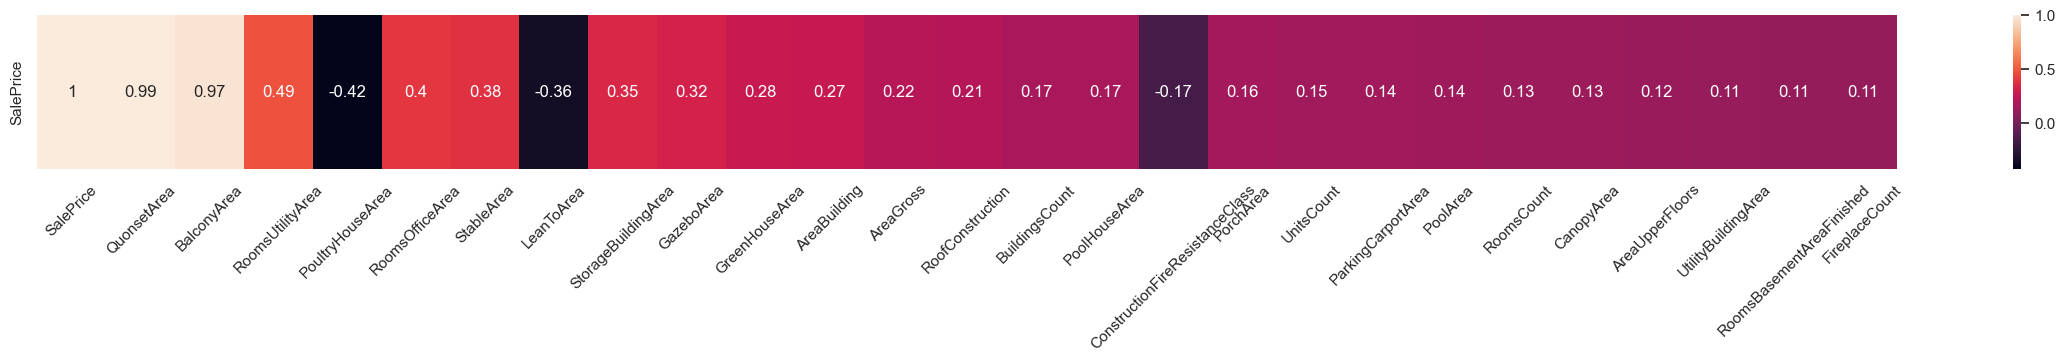

In [9]:
corr = train_one.select_dtypes(include = ['float64', 'int64']).corr()
x = corr.loc[:,['SalePrice']]
x.sort_values(by='SalePrice',key=lambda x: -abs(x))


corr = train_one.select_dtypes(include = ['float64', 'int64']).corr()
x = corr.loc[:,['SalePrice']]
x = x.sort_values(by='SalePrice',key=lambda x: -abs(x))
y = (abs(x) > 0.1).T
del0 = [a for a,b in enumerate(y) if int(y[b]) == 0]
del1 = [a for a,b in enumerate(y) if int(y[b]) == 1]


plt.figure(figsize=(30,2))
sns.set_theme()
sns.heatmap(x.drop(x.index[del0]).T, annot=True) # cmap='viridis',
plt.xticks(rotation=45)

plt.show()

### Plot 3: Missing percentages distirbution

In [10]:
y_train = train.SalePrice.values
target = y_train

all_data = train_one
all_data.drop(["SalePrice"], axis=1, inplace=True)

print(all_data.shape)

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na

(475351, 133)


HouseID                  0.000000
RecordingDate            0.000000
PropertyAddressCity      0.030504
PropertyAddressState     0.000000
PropertyAddressZIP       0.038287
                          ...    
StorageBuildingArea     99.833597
StorageBuildingFlag      0.000000
UtilityBuildingArea     99.531504
UtilityBuildingFlag     99.531714
PoleStructureArea       99.990744
Length: 133, dtype: float64

In [11]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})

all_data_notna = (all_data.isnull().sum() / len(all_data)) * 100
all_data_notna = all_data_notna.drop(all_data_notna[all_data_notna != 0].index).sort_values(ascending=False)


Text(0, 0.5, 'Percent of missing values')

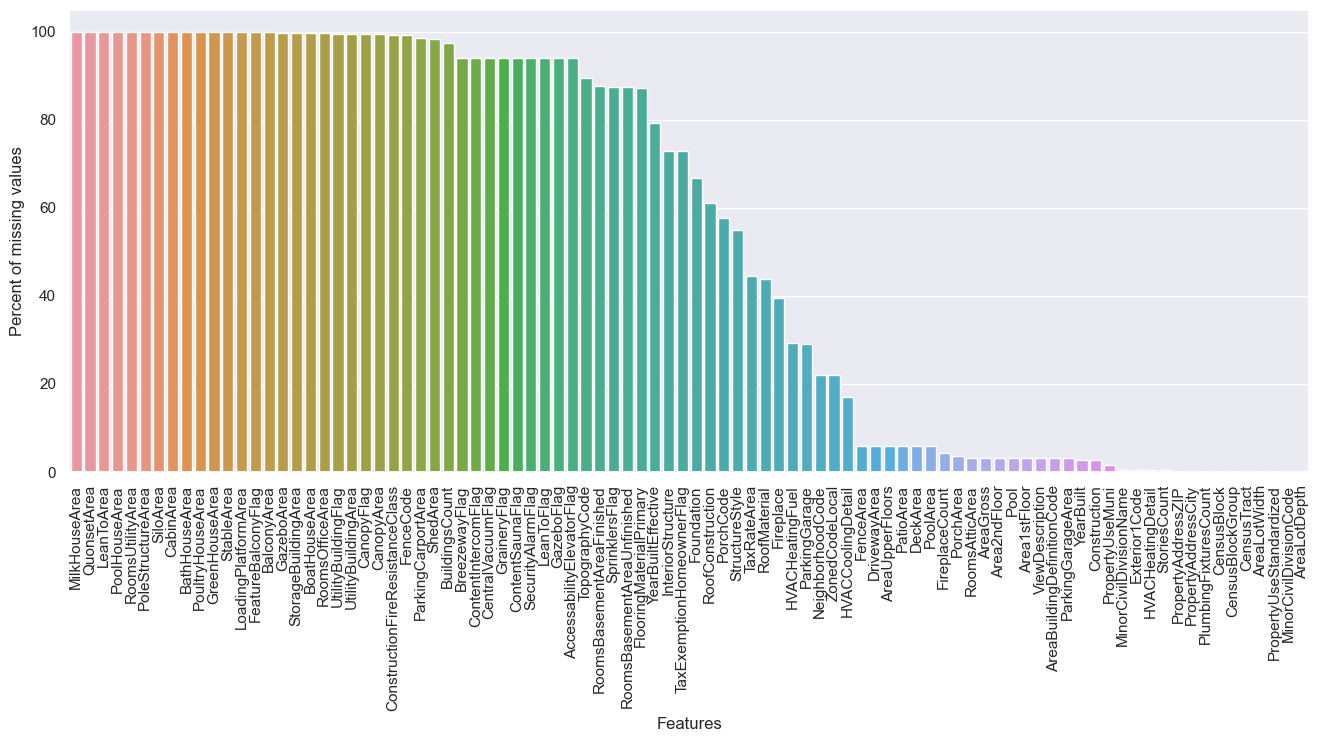

In [12]:
plt.figure(figsize=(16,6))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Percent of missing values")

### Plot 4: Box-Cox transformation

count    475351.000000
mean         12.644425
std           0.845330
min           9.212438
25%          12.198519
50%          12.652360
75%          13.151922
max          21.421401
Name: SalePrice, dtype: float64


/var/folders/b0/jgk470jj3v9gjzh3bkpsqm6c0000gn/T/ipykernel_9410/3118068932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='g',hist_kws={'alpha':0.4})


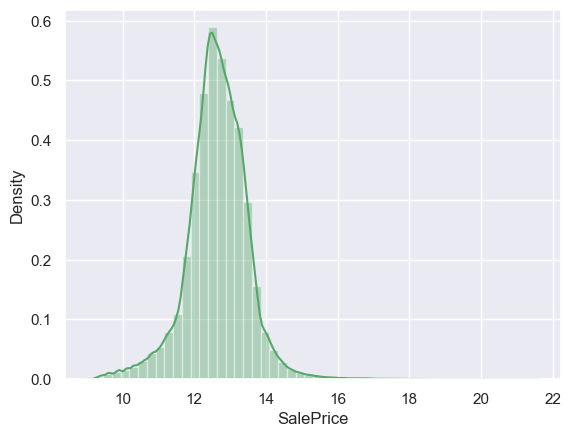

In [13]:
train['SalePrice'] = train['SalePrice'].transform(lambda x:np.log(x))
print(train['SalePrice'].describe())
sns.distplot(train['SalePrice'], color='g',hist_kws={'alpha':0.4})
plt.show()

### Plot 5: Heatmap after feature engineering

## Model performance


| Models | OOB/Validation RMSE | Kaggle (40%) |
| --- | --- | --- |
| Random Forests | 0.336 | 0.268 |
| Gradient Boosting Tree | 0.328 | 0.276 |
| Ridge |  | .843 |

**Hyperparameter selection**

| Models | Best Parameters | Search Space |  |
| --- | --- | --- | --- |
| Random Forests | num_trees = 600 | Until OOB metric stops decreasing |
| | max_depth = 30 | [10, 20, 25, 30, 50] |
| | attributes_ratio = 0.15  | [0.1, 0.15, 0.2, 0.25, 0.3, 0.4] |
| Gradient Boosting Tree | num_trees = 300, min_examples = 6, | [200,300,400,500],[6,7,8,9]|
| |                        growing_strategy = "LOCAL",  |["LOCAL","BEST_FIRST_GLOBAL"]|
| |                        use_hessian_gain = False, | [T,F] |
| |                        um_candidate_attributes_ratio = 0.6,| [0.2, 0.4, 0.5, 0.6, 0.7, 0.9]) |
| |                        shrinkage = 0.15 |[0.02, 0.05, 0.10, 0.15, 0.2, 0.25]|
| | max_depth = 10| [3, 4, 5, 6,8, 10, 12, 15, 20] |
| Ridge |  | |


In [15]:
gbt = pd.read_csv('gbt.csv', index_col=0)
gbt.sort_values('score', ascending=False).head(5)


score  evaluation_time   best  num_trees  min_examples  \
49 -0.326847      8818.052393   True        300             6   
5  -0.330260      3028.845075  False        500             8   
44 -0.330330      7787.425816  False        500             9   
47 -0.331380      8085.883671  False        300             9   
30 -0.331827      7058.045663  False        500             9   

     growing_strategy  max_num_nodes  use_hessian_gain  shrinkage  \
49              LOCAL            NaN             False       0.15   
5               LOCAL            NaN              True       0.20   
44  BEST_FIRST_GLOBAL          128.0             False       0.15   
47              LOCAL            NaN              True       0.15   
30              LOCAL            NaN              True       0.25   

    num_candidate_attributes_ratio  max_depth  
49                             0.6       10.0  
5                              0.5       12.0  
44                             0.7        NaN  
47                             0.7       15.0  
30                             0.5        8.0

In [16]:
rf = pd.read_csv('rf.csv', index_col=0)
rf.sort_values('score', ascending=False).head(5)

score  evaluation_time   best  max_depth  num_trees  \
29 -0.283607      2346.248998   True         30       1000   
72 -0.283671      8549.611858  False         30        600   
56 -0.283672      7282.543192  False         30        800   
31 -0.283836      2387.857367  False         30        500   
14 -0.283884      1292.250705  False         20       1000   

    num_candidate_attributes_ratio  
29                             0.1  
72                             0.1  
56                             0.1  
31                             0.1  
14                             0.1

## Model training and Model composition

In [ ]:
from tqdm import tqdm
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import scipy

In [ ]:
# datasets after filling out missing values
train = pd.read_pickle('train_do.pkl')
test = pd.read_pickle('test_do.pkl')

In [ ]:
label = 'SalePrice'

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label=label, task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, task = tfdf.keras.Task.REGRESSION)

GBT = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION, 
                                           num_trees = 300, min_examples = 6, growing_strategy = "LOCAL",
                                           use_hessian_gain = False, shrinkage = 0.15,
                                           num_candidate_attributes_ratio = 0.6,
                                           max_depth = 10, random_seed=1111)
GBT.fit(train_ds, verbose=2)

In [ ]:
GBT2 = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION, 
                                           num_trees = 500, min_examples = 8, growing_strategy = "LOCAL",
                                           use_hessian_gain = True, shrinkage = 0.2,
                                           num_candidate_attributes_ratio = 0.5,
                                           max_depth = 12, random_seed=2222)
GBT2.fit(train_ds)

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION, num_trees=1000, 
                                  max_depth=30, num_candidate_attributes_ratio = 0.1, random_seed=0)



rf.fit(x=train_ds, verbose=2)

Prediction

In [ ]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test,
    task = tfdf.keras.Task.REGRESSION)

test_data = pd.read_csv("test_data.csv")
ids = test_data.pop('RecordID')

In [ ]:
preds_gbt = GBT.predict(test_ds)
preds_gbt2 = GBT2.predict(test_ds)
preds_rf = rf.predict(test_ds)

final_solution = np.concatenate([preds_rf, preds_gbt,preds_gbt2],axis=1) 
final_solution = np.mean(final_solution,axis=1)

output = pd.DataFrame({'RecordID': ids,
                       'SalePrice': np.exp(final_solution.squeeze())})

output.to_csv('submission_tfdf_comp.csv', index=False)